In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("/content/amazon.csv")

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [97]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [98]:
df.dropna(inplace=True)

In [99]:
df['rating_count'] = df['rating_count'].str.replace(',', '')
# df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

In [101]:
df['rating_count'] = df['rating_count'].astype(int)

In [102]:
# remove the row where rating is '|'
df = df[df['rating'] != '|']

In [103]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(float)

df['rating'] = df['rating'].str.replace('out of 5 stars', '')
df['rating'] = df['rating'].astype(float)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   float64
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

**1. What is the average rating for each product category?**

In [106]:
# prompt: What is the average rating for each product category?

average_ratings = df.groupby('category')['rating'].mean()
pd.DataFrame(average_ratings)


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


**2. What are the top rating_count products by category?**

In [107]:
# cannot convert float NaN to integer
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

In [108]:
df['rating_count'].info()

<class 'pandas.core.series.Series'>
Index: 1462 entries, 0 to 1464
Series name: rating_count
Non-Null Count  Dtype
--------------  -----
1462 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


In [109]:
df.sort_values(by='rating_count', ascending=False).groupby('category').head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69.0,4.4,426973,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,999.0,62.0,4.1,363713,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...
370,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,8499.0,10999.0,23.0,4.1,313836,Processor: Octa-core Helio G35 and upto 2.3GHz...,"AF7B5AJJZP2WKRD74Z45L7YDOEHA,AGEYI2JEUE752XDEX...","Roshan Renji Cherian,SivavaraprasadPV,Kranthi,...","RCP907FSHW2CI,R2XSNFIDSF8IL4,R2JB9PO5MV9LER,R1...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,https://m.media-amazon.com/images/I/416SpYgTVY...,https://www.amazon.in/Redmi-Activ-Carbon-Black...
1028,B01LWYDEQ7,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,199.0,495.0,60.0,4.1,270563,Unique string function to chop vegetables and ...,"AGJTPXSZDYEWZM76UMJXCHUUPJSQ,AH4ON4ZDRHM5PWVW6...","Harshit,Fazeela,Chiranjiv Singh,Joseph Ka,Rohi...","R284SZGRNQQXYS,R3O2GOW05S3YSF,R28FXK3KNQP51T,R...","Nice chopper,Small easy use n clean,Not good,G...","1st product came faulty got it replaced , repl...",https://m.media-amazon.com/images/I/41cVgYgAKp...,https://www.amazon.in/Pigeon-Stovekraft-Plasti...
588,B005FYNT3G,SanDisk Cruzer Blade 32GB USB Flash Drive,Computers&Accessories|ExternalDevices&DataStor...,289.0,650.0,56.0,4.3,253105,"Ultra-compact and portable USB flash drive,Cap...","AFNMA3FQAONYMREOFLNYF2RV4AOA,AHAYDWCGM4QNXWBCR...","RAJIV D.,Antony Gruz,ajay,Praveen kumar,Sujoy ...","R2XCI5KR2H8QEI,R3BNQCB05PYZMV,RVXXO15AGASNX,R1...","Good product,Affordable,Good,Reding speed is o...","Very chip very good,Really happy to buy this p...",https://m.media-amazon.com/images/I/310mw9KTJv...,https://www.amazon.in/SanDisk-Cruzer-Blade-Fla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,B0BDS8MY8J,"Lapster Caddy for ssd and HDD, Optical Bay 2nd...",Computers&Accessories|Components|InternalHardD...,199.0,999.0,80.0,4.2,362,Compatible 4 Channels switch help to improve t...,"AF52SZE3RZ4OMSOTV2XLI7FOVKMA,AH3M2HOCS7VMTXCOY...","Digvijay,Vismay,Yogesh,Rajesh K.,Yogesh Dhurve...","R1WLBATEAWUA8W,R39NO1SN8E0IFY,R2HHNNLIN82NKF,R...","🌟🌟🌟🌟,Good product,Nice product,Product quality...",GO FOR IT BUT I MADE SOME CHANGES TO FIX MY DV...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Lapster-Caddy-Optical-Dr...
1014,B0B2RBP83P,"Lenovo IdeaPad 3 11th Gen Intel Core i3 15.6"" ...",Computers&Accessories|Laptops|TraditionalLaptops,37247.0,59890.0,38.0,4.0,323,Processor: 11th Gen Intel Core i3-1115G4 | Spe...,"AF5IDL42LBZCZ7A5YDGM2QFNUHEQ,AHPQHJVDA6JHFNRN7...","Mb,Amazon Customer,Adnan Malik,AD,Pradeep Rajb...","R2WGS6Q7F9F4Y5,R1VS2WU12H9Z2C,RMPKJJKZC848Y,R4...","Value for money laptop for normal usage,Works ...",If you are lookin

**3. What is the distribution of discounted prices vs. actual prices?**

<ipython-input-121-7a00dc3fe65c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['discounted_price'],label='discounted_price', hist=False)
<ipython-input-121-7a00dc3fe65c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['actual_price'],label='actual_price', hist=False)


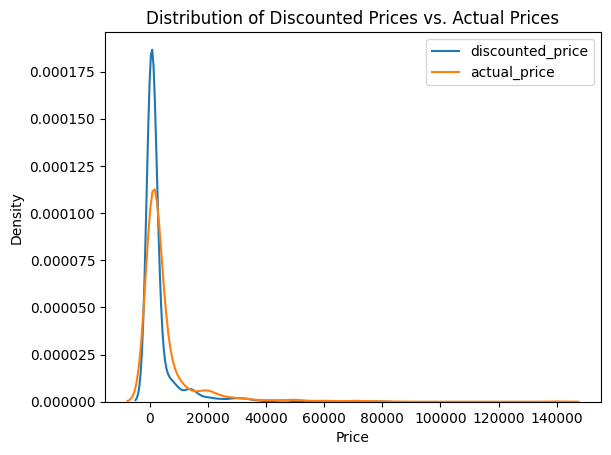

In [121]:
sns.distplot(df['discounted_price'],label='discounted_price', hist=False)
sns.distplot(df['actual_price'],label='actual_price', hist=False)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

**4. How does the average discount percentage vary across categories?**

In [124]:
average_discounts = df.groupby('category')['discount_percentage'].mean()
pd.DataFrame(average_discounts)

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


**5. What are the most popular product names?**

In [132]:
df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False).head(10)

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                                    

**6. What are the most popular product keywords?**

In [135]:
# Extract keywords from product names
df['keywords'] = df['product_name'].str.split()

# Flatten the keywords list
keywords = [keyword for sublist in df['keywords'].tolist() for keyword in sublist]

# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords).value_counts().head(10)

# Display the most popular keywords
print("Most popular product keywords:")
print(keyword_counts.to_string())

Most popular product keywords:
with        716
for         614
|           456
&           431
USB         342
and         309
Cable       304
-           218
Charging    210
Fast        206


**7. What are the most popular product reviews?**

In [144]:
df['review_title'].value_counts().head(10)

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very n

**8. What is the correlation between discounted_price and rating?**

In [145]:
correlation = df['discounted_price'].corr(df['rating'])
print("Correlation between discounted_price and rating:", correlation)


Correlation between discounted_price and rating: 0.12113187526066266


**9. What are the Top 5 categories based on the highest ratings?**

In [146]:
df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

**10. Identify any potential areas for improvement or optimization based on the data analysis.**

In [147]:

# Based on the data analysis, the following areas could be improved or optimized:

# 1. Improve data quality:
#    - Investigate and handle missing values in the 'rating_count' column.
#    - Ensure consistency in data types for columns like 'rating_count'.

# 2. Explore customer sentiment analysis on product reviews to identify common themes and areas for improvement.

# 3. Analyze the relationship between discounted prices and ratings to determine optimal pricing strategies.

# 4. Investigate the most popular product categories and keywords to identify potential opportunities for product development or marketing campaigns.

# 5. Analyze the correlation between various features such as rating, discounted price, and actual price to understand their impact on sales and customer satisfaction.

# 6. Monitor and track key metrics like average rating, number of reviews, and discount percentages to identify trends and make informed business decisions.

# 7. Regularly review and update the data analysis to ensure it remains relevant and actionable.
